# Convolution with Theis (fluctuating extraction in a confined aquifer)

## Transient gorundwater course IHE, in class 2024-02-21

T.N.Olsthoorn

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 as Wt
from scipy.signal import lfilter, sosfilt

In [31]:
kD = 650 # m2/d
S  = 0.1 # [-]
Rs = [20, 50, 150] # m
dtau = 1.0 # d
tau = np.arange(0, 1000, dtau, dtype=float)
tau = np.arange(0, 1000, dtau)
# d
tau[0] = 0.5 * dtau

time = np.datenum64('2024-02-21 16:00:00') + tau * np.timedelta64(1, 'D')

# Get the step response and the block response

The reaction of the system due to a unit input (e.g. Q = 1 m3/d, or recharge is 1 m).

Then we can compute the response with our transient formulas

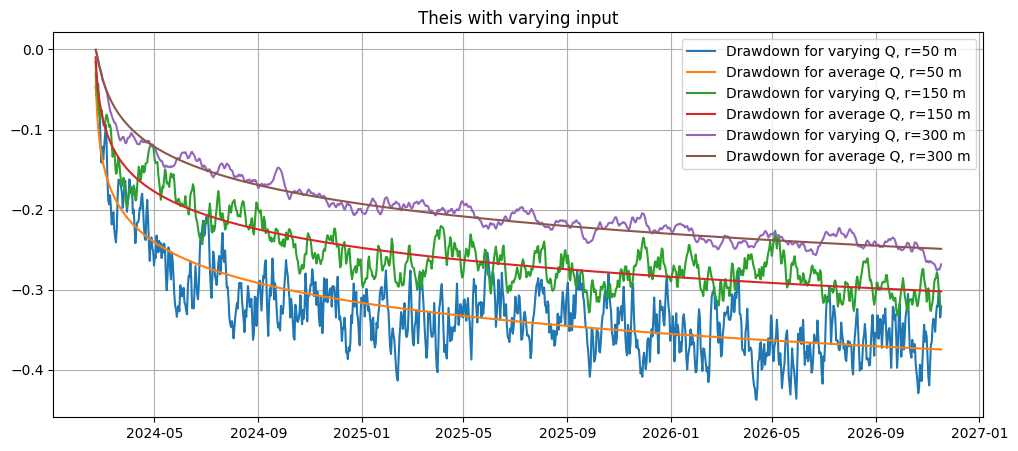

In [43]:
for r in [50, 150, 300]:
    u = r ** 2 * S / (4 * kD * tau)
    SR = 1.0 / (4 * np.pi * kD) * Wt(u)
    
    BR = SR[:-1] - SR[1:]
    
    Q = 800 * np.random.rand(1000)
    
    s1 = lfilter(BR, 1, Q)
    s2 = lfilter(BR, 1, np.ones_like(Q) * Q.mean())
    
    plt.title('Theis with varying input')
    plt.xlabel=('time e')
    plt.ylabel=('drawdown m')
    plt.grid()
    
    plt.plot(time, s1, label = 'Drawdown for varying Q, r={:.0f} m'.format(r))
    plt.plot(time, s2, label = 'Drawdown for average Q, r={:.0f} m'.format(r))

plt.legend()

fig = plt.gcf()
fig.set_size_inches(12, 5)

In [38]:
time = np.datetime64('2024-02-21 16:00:00') + tau * np.timedelta64(1, 'D')
time

array(['2024-02-21T16:00:00', '2024-02-22T16:00:00',
       '2024-02-23T16:00:00', '2024-02-24T16:00:00',
       '2024-02-25T16:00:00', '2024-02-26T16:00:00',
       '2024-02-27T16:00:00', '2024-02-28T16:00:00',
       '2024-02-29T16:00:00', '2024-03-01T16:00:00',
       '2024-03-02T16:00:00', '2024-03-03T16:00:00',
       '2024-03-04T16:00:00', '2024-03-05T16:00:00',
       '2024-03-06T16:00:00', '2024-03-07T16:00:00',
       '2024-03-08T16:00:00', '2024-03-09T16:00:00',
       '2024-03-10T16:00:00', '2024-03-11T16:00:00',
       '2024-03-12T16:00:00', '2024-03-13T16:00:00',
       '2024-03-14T16:00:00', '2024-03-15T16:00:00',
       '2024-03-16T16:00:00', '2024-03-17T16:00:00',
       '2024-03-18T16:00:00', '2024-03-19T16:00:00',
       '2024-03-20T16:00:00', '2024-03-21T16:00:00',
       '2024-03-22T16:00:00', '2024-03-23T16:00:00',
       '2024-03-24T16:00:00', '2024-03-25T16:00:00',
       '2024-03-26T16:00:00', '2024-03-27T16:00:00',
       '2024-03-28T16:00:00', '2024-03-29T16:0